Nama : Muhammad Thayyib

Dataset dari : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer

In [1]:
# Install kaggle package
!pip install -q kaggle

In [2]:
# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadthayyib","key":"46f5edf66277196031b555d34c2985e2"}'}

In [3]:
# Make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

# Test kaggle dataset list
!kaggle datasets list

kaggle.json
ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                            Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          14301        258  1.0              
sudarshan24byte/online-food-dataset                           Online Food Dataset                                  3KB  2024-03-02 18:50:30           4040         66  0.9411765        
saurabhbadole/housing-price-data                              Housing Price Data                                   5KB  2024-03-13 05:07:54           1359         28  0.88235295       
arnavvvvv/spotify-music                                       T

In [4]:
# Download dataset from kaggle dataset
!kaggle datasets download -d rkiattisak/salaly-prediction-for-beginer

  0% 0.00/3.20k [00:00<?, ?B/s]
100% 3.20k/3.20k [00:00<00:00, 7.81MB/s]


In [5]:
import zipfile
import os

# Path dataset ZIP yang diunduh
zip_file_path = "/content/salaly-prediction-for-beginer.zip"  # Ganti dengan path sesuai dengan file ZIP dataset yang diunduh

# Folder tempat untuk mengekstrak dataset
extracted_folder_path = "/content/salary_dataset"  # Ganti dengan path folder tempat Anda ingin mengekstrak dataset

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [6]:
# Memeriksa isi dari folder ekstraksi
print(os.listdir(extracted_folder_path))

['Salary Data.csv']


**Import Library yang Diperlukan**

Library yang diimpor digunakan untuk analisis data, visualisasi data, preprocessing data, dan pembuatan model.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
# Memuat dataset ke dalam DataFrame
data = pd.read_csv("/content/salary_dataset/Salary Data.csv")

In [10]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Data Exploration**

- Melihat informasi dasar dataset untuk memeriksa jenis data dan apakah ada nilai yang hilang.
- Menampilkan deskripsi statistik dari dataset untuk melihat ringkasan statistik dari setiap kolom.
- Memeriksa distribusi gaji dengan histogram.
- Menampilkan korelasi antar fitur numerik dengan heatmap.


In [11]:
# Melihat informasi dasar dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [12]:
# Melihat statistik deskriptif dari dataset
print(data.describe())

              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


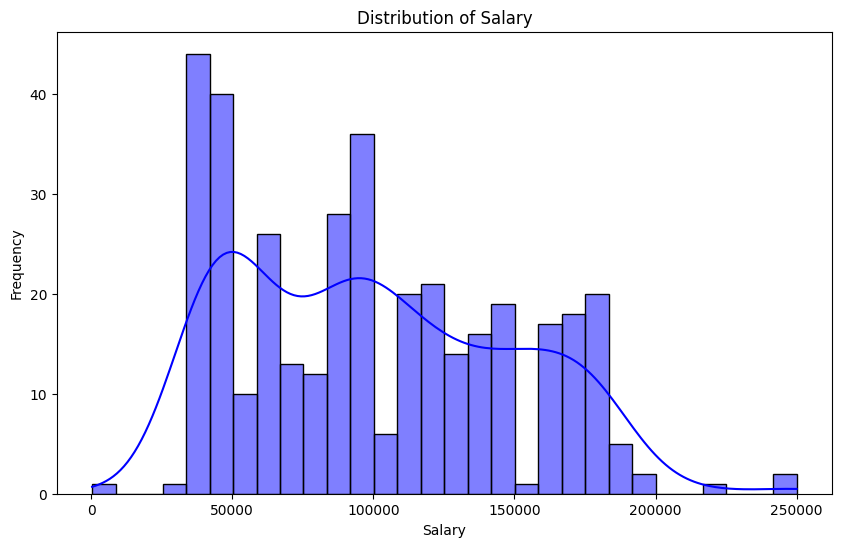

In [13]:
# Melihat distribusi gaji dengan histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Salary'], bins=30, kde=True, color='blue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-8985234dbdc5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


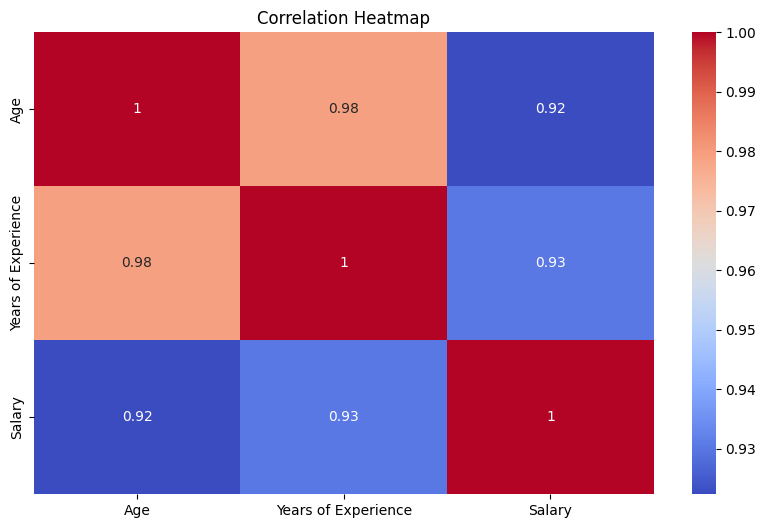

In [14]:
# Melihat korelasi antar fitur numerik dengan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Missing Values**

Mengecek dan menangani nilai yang hilang:

- Mengisi nilai yang hilang dengan rata-rata untuk fitur numerik.
- Mengisi nilai yang hilang dengan modus untuk fitur kategorikal.

In [15]:
# Periksa missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [16]:
# Isi missing values dengan nilai rata-rata untuk fitur numerik
numeric_features = ['Age', 'Years of Experience']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [17]:
# Isi missing values dengan nilai mode untuk fitur kategorikal
categorical_features = ['Gender', 'Education Level', 'Job Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

**Data Preprocessing**

- Menggunakan ColumnTransformer untuk menggabungkan preprocessing untuk fitur numerik dan kategorikal.
- Pisahkan variabel target dan fitur.

In [18]:
# Gabungkan preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [19]:
# Pisahkan variabel target dan fitur
X = data.drop(columns=['Salary'])
y = data['Salary']

In [20]:
# Periksa dan tangani nilai NaN dalam variabel target
if y.isnull().any():
    print("Variabel target mengandung nilai NaN.")
    y = y.dropna()  # Hapus baris dengan nilai NaN
    X = X.dropna()  # Hapus baris yang sesuai dari fitur

Variabel target mengandung nilai NaN.


**Split Dataset**

Membagi dataset menjadi data latih dan data uji dengan rasio 80:20.

In [21]:
# Pisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Definisikan pipeline model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [23]:
# Latih model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [24]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [25]:
# Evaluasi model menggunakan Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 296285366.6666667


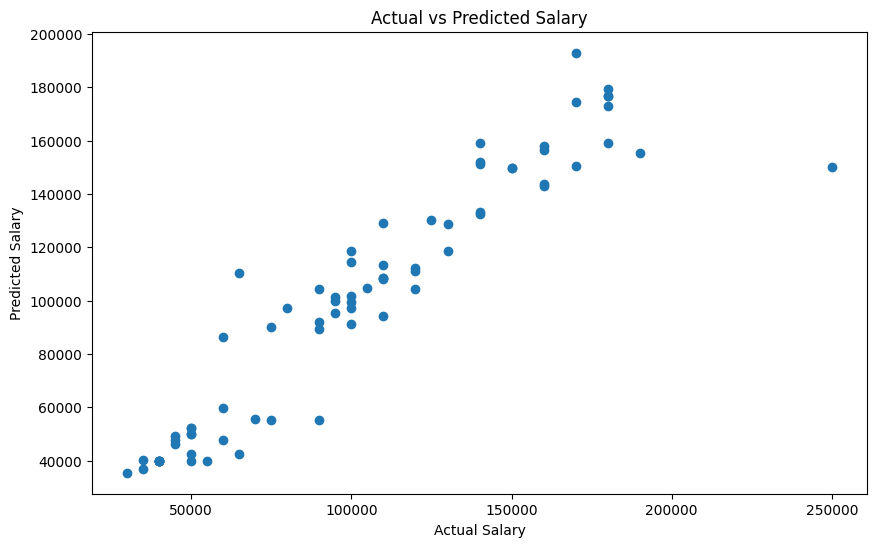

In [26]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()